In [17]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
!pip install --upgrade scikit-learn
!pip install category_encoders
!pip install --upgrade numpy
!pip install eli5
!pip install -q shap
!pip install pdpbox

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 80 kB 6.3 MB/s 
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 216 kB 8.7 MB/s 
     |████████████████████████████████| 133 kB 4.6 MB/s 
  Created wheel for eli5: filename=eli5-0.13.0-py2.py3-none-any.whl size=107748 sha256=a0b0f4099b00faee337038b84ddd1b32c8bb971b10195e52db648d7c579b96b3
  Stored in directory: /root/.cache/pip/wheels/cc/3c/96/3ead31a8e6c20fc0f1a707fde2e05d49a80b1b4b30096573be
Successfully built eli5
  Attempting uninstall: jinja2
    Found existing installation: Jinja2 2.11.3
    Uninstalling Jinja2-2.11.3:
      Successfully uninstalled Jinja2-2.1

In [107]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from pandas_profiling import ProfileReport

from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.model_selection import train_test_split
from sklearn.pipeline import make_pipeline, Pipeline
from category_encoders import OneHotEncoder, OrdinalEncoder, TargetEncoder
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from lightgbm import LGBMRegressor
from sklearn.linear_model import RidgeCV, LassoCV
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
from sklearn.model_selection import cross_val_score

import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
import eli5
from eli5.sklearn import PermutationImportance
from pdpbox.pdp import pdp_isolate, pdp_plot
import shap

---
# 데이터 탐색

In [108]:
import pandas as pd

train = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/section2/archive (6)/Train.csv") 
X_test = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/section2/archive (6)/Test.csv")

In [109]:
train.shape, X_test.shape

((7000, 24), (3000, 23))

In [ ]:
#feature 설명

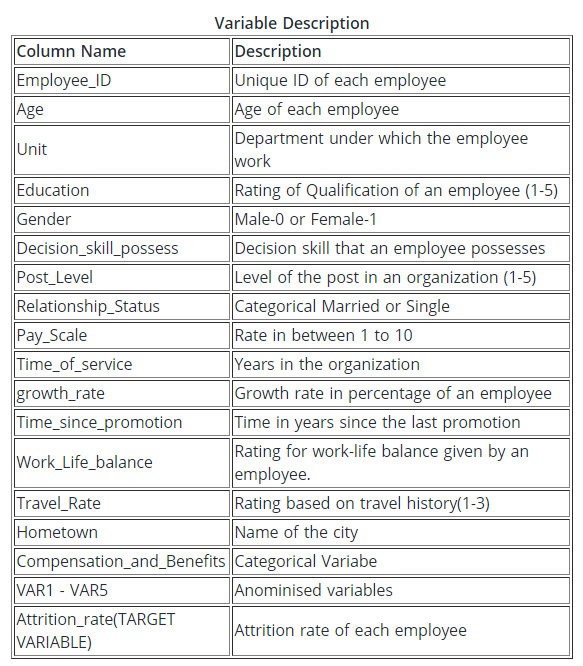

In [ ]:
train.head()

,Employee_ID,Gender,Age,Education_Level,Relationship_Status,Hometown,Unit,Decision_skill_possess,Time_of_service,Time_since_promotion,...,Compensation_and_Benefits,Work_Life_balance,VAR1,VAR2,VAR3,VAR4,VAR5,VAR6,VAR7,Attrition_rate
0,EID_23371,F,40-44,4,Married,Franklin,IT,Conceptual,Under 10,4,...,type2,3.0,4,0.7516,1.8688,2.0,4,5,3,0.1841
1,EID_18000,M,Under 25,3,Single,Springfield,Logistics,Analytical,Under 10,4,...,type2,4.0,3,-0.9612,-0.4537,2.0,3,5,3,0.0670
2,EID_3891,F,55-59,3,Married,Clinton,Quality,Conceptual,20-29,3,...,type2,1.0,4,-0.9612,-0.4537,3.0,3,8,3,0.0851
3,EID_17492,F,25-29,3,Single,Lebanon,Human Resource Management,Behavioral,Under 10,3,...,type2,1.0,3,-1.8176,-0.4537,2.0,3,7,3,0.0668
4,EID_22534,F,30-34,1,Married,Springfield,Logistics,Conceptual,Under 10,4,...,type3,3.0,1,0.7516,-0.4537,2.0,2,8,2,0.1827


In [ ]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7000 entries, 0 to 6999
Data columns (total 24 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Employee_ID                7000 non-null   object 
 1   Gender                     7000 non-null   object 
 2   Age                        6588 non-null   float64
 3   Education_Level            7000 non-null   int64  
 4   Relationship_Status        7000 non-null   object 
 5   Hometown                   7000 non-null   object 
 6   Unit                       7000 non-null   object 
 7   Decision_skill_possess     7000 non-null   object 
 8   Time_of_service            6856 non-null   float64
 9   Time_since_promotion       7000 non-null   int64  
 10  growth_rate                7000 non-null   int64  
 11  Travel_Rate                7000 non-null   int64  
 12  Post_Level                 7000 non-null   int64  
 13  Pay_Scale                  6991 non-null   float

In [21]:
pd.DataFrame(train.nunique())

,0
Employee_ID,7000
Gender,2
Age,47
Education_Level,5
Relationship_Status,2
Hometown,5
Unit,12
Decision_skill_possess,4
Time_of_service,44
Time_since_promotion,5


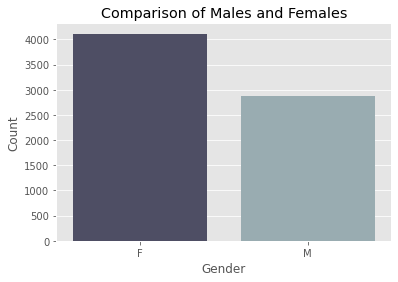

In [43]:
#남녀 재직자 비율
plt.figure(figsize=(10, 5))
%matplotlib inline 
sns.countplot(train['Gender'], palette = 'bone')
plt.title('Comparison of Males and Females', fontweight = 30)
plt.xlabel('Gender')
plt.ylabel('Count')
plt.show()

Text(0, 0.5, 'count')

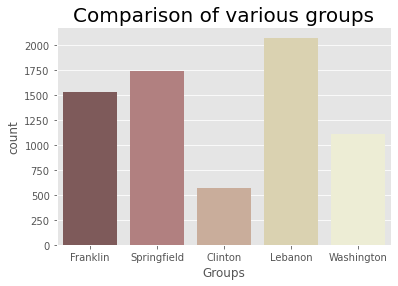

In [44]:
#출신 도시별 재직자
plt.style.use('ggplot')
plt.figure(figsize=(10, 5))
%matplotlib inline 
sns.countplot(train['Hometown'], palette = 'pink')
plt.title('Comparison of various groups', fontweight = 30, fontsize = 20)
plt.xlabel('Groups')
plt.ylabel('count')

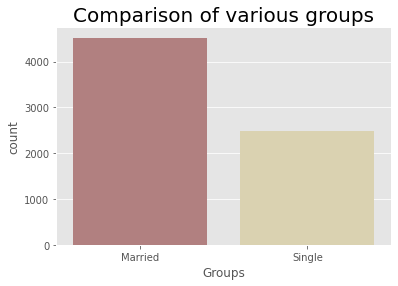

In [45]:
plt.style.use('ggplot')
plt.figure(figsize=(10, 5))
%matplotlib inline 
sns.countplot(train['Relationship_Status'], palette = 'pink')
plt.title('Comparison of various groups', fontweight = 30, fontsize = 20)
plt.xlabel('Groups')
plt.ylabel('count');

In [48]:
per1=train[['Gender','Attrition_rate']].groupby(['Gender']).agg('mean')
per1

,Attrition_rate
Gender,
F,0.184936
M,0.195706


In [49]:
per2=train[['Hometown','Attrition_rate']].groupby(['Hometown']).agg('mean')
per2

,Attrition_rate
Hometown,
Clinton,0.188464
Franklin,0.187901
Lebanon,0.187019
Springfield,0.194084
Washington,0.188895


In [47]:
per3=train[['Relationship_Status','Attrition_rate']].groupby(['Relationship_Status']).agg('mean')
per3

,Attrition_rate
Relationship_Status,
Married,0.188123
Single,0.191660


In [53]:
per4=train[['Unit','Attrition_rate']].groupby(['Unit']).agg('mean')
per4

,Attrition_rate
Unit,
Accounting and Finance,0.187362
Human Resource Management,0.184617
IT,0.180985
Logistics,0.184379
Marketing,0.191922
Operarions,0.197777
Production,0.190742
Purchasing,0.199565
Quality,0.185676


In [56]:
per5=train[['Pay_Scale','Attrition_rate']].groupby(['Pay_Scale']).agg('mean')
per5

,Attrition_rate
Pay_Scale,
1.0,0.174768
2.0,0.197371
3.0,0.206650
4.0,0.192811
5.0,0.190981
6.0,0.187430
7.0,0.188802
8.0,0.188706
9.0,0.179588


In [ ]:
per6=train[['Time_of_service','Attrition_rate']].groupby(['Time_of_service']).agg('mean')
per6

In [61]:
per7=train[['Post_Level','Attrition_rate']].groupby(['Post_Level']).agg('mean')
per7

,Attrition_rate
Post_Level,
1,0.189832
2,0.185217
3,0.187232
4,0.195130
5,0.198197


In [62]:
per8=train[['Compensation_and_Benefits','Attrition_rate']].groupby(['Compensation_and_Benefits']).agg('mean')
per8

,Attrition_rate
Compensation_and_Benefits,
type0,0.219540
type1,0.203216
type2,0.190238
type3,0.184753
type4,0.189747


In [160]:
per9=train[['growth_rate','Attrition_rate']].groupby(['growth_rate']).agg('mean')
per9

,Attrition_rate
growth_rate,
Under 30,0.156985
30-39,0.163703
40-49,0.166949
50-59,0.162302
60-69,0.164383
Over 70,0.165073


In [162]:
per10=train[['Travel_Rate','Attrition_rate']].groupby(['Travel_Rate']).agg('mean')
per10

,Attrition_rate
Travel_Rate,
0,0.167043
1,0.160634
2,0.163510




---

# EDA

In [110]:
#EDA
def missing_values_table(df):
        # Total missing values
        mis_val = df.isnull().sum()
        
        # Percentage of missing values
        mis_val_percent = 100 * df.isnull().sum() / len(df)
        
        # Make a table with the results
        mis_val_table = pd.concat([mis_val, mis_val_percent], axis=1)
        
        # Rename the columns
        mis_val_table_ren_columns = mis_val_table.rename(
        columns = {0 : 'Missing Values', 1 : '% of Total Values'})
        
        # Sort the table by percentage of missing descending
        mis_val_table_ren_columns = mis_val_table_ren_columns[
            mis_val_table_ren_columns.iloc[:,1] != 0].sort_values(
        '% of Total Values', ascending=False).round(1)
        
        # Print some summary information
        print ("Your selected dataframe has " + str(df.shape[1]) + " columns.\n"      
            "There are " + str(mis_val_table_ren_columns.shape[0]) +
              " columns that have missing values.")
        
        # Return the dataframe with missing information
        return mis_val_table_ren_columns

missing_values_table(train)

Your selected dataframe has 24 columns.
There are 6 columns that have missing values.


,Missing Values,% of Total Values
VAR4,656,9.4
VAR2,577,8.2
Age,412,5.9
Time_of_service,144,2.1
Work_Life_balance,11,0.2
Pay_Scale,9,0.1


In [112]:
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(strategy='most_frequent')
train.iloc[:,:] = imputer.fit_transform(train)

train.isna().sum()

Employee_ID                  0
Gender                       0
Age                          0
Education_Level              0
Relationship_Status          0
Hometown                     0
Unit                         0
Decision_skill_possess       0
Time_of_service              0
Time_since_promotion         0
growth_rate                  0
Travel_Rate                  0
Post_Level                   0
Pay_Scale                    0
Compensation_and_Benefits    0
Work_Life_balance            0
VAR1                         0
VAR2                         0
VAR3                         0
VAR4                         0
VAR5                         0
VAR6                         0
VAR7                         0
Attrition_rate               0
dtype: int64

In [ ]:
missing_values_table(train)

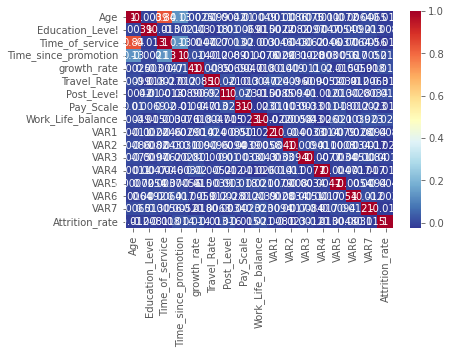

In [64]:
#상관관계 확인
colormap = plt.cm.PuBu 
plt.figure(figsize=(15, 15)) 
%matplotlib inline 
dataplot = sns.heatmap(train.corr(), cmap='RdYlBu_r', annot=True)
plt.show()

In [114]:
#범위가 너무 많은 컬럼 조정

# Age
bins_age = [0, 25, 30, 35, 40, 45, 50, 55, 60, 100]
labels_age = ['Under 25', '25-29', '30-34','35-39','40-44', '45-49','50-54','55-59', 'Over 60']
train['Age'] = pd.cut(train['Age'], bins_age, right=False, labels=labels_age)


# Time of service
bins_time_of_service = [0, 10, 20, 30, 40, 100]
labels_time_of_service = ['Under 10', '10-19', '20-29', '30-39','Over 40']
train['Time_of_service'] = pd.cut(train['Time_of_service'], bins_time_of_service, right=False, labels=labels_time_of_service)

# growth rate
bins_growth_rate = [0, 30, 40, 50, 60, 70, 100]
labels_growth_rate = ['Under 30', '30-39', '40-49', '50-59', '60-69', 'Over 70']
train['growth_rate'] = pd.cut(train['growth_rate'], bins_growth_rate, right=False, labels=labels_growth_rate)

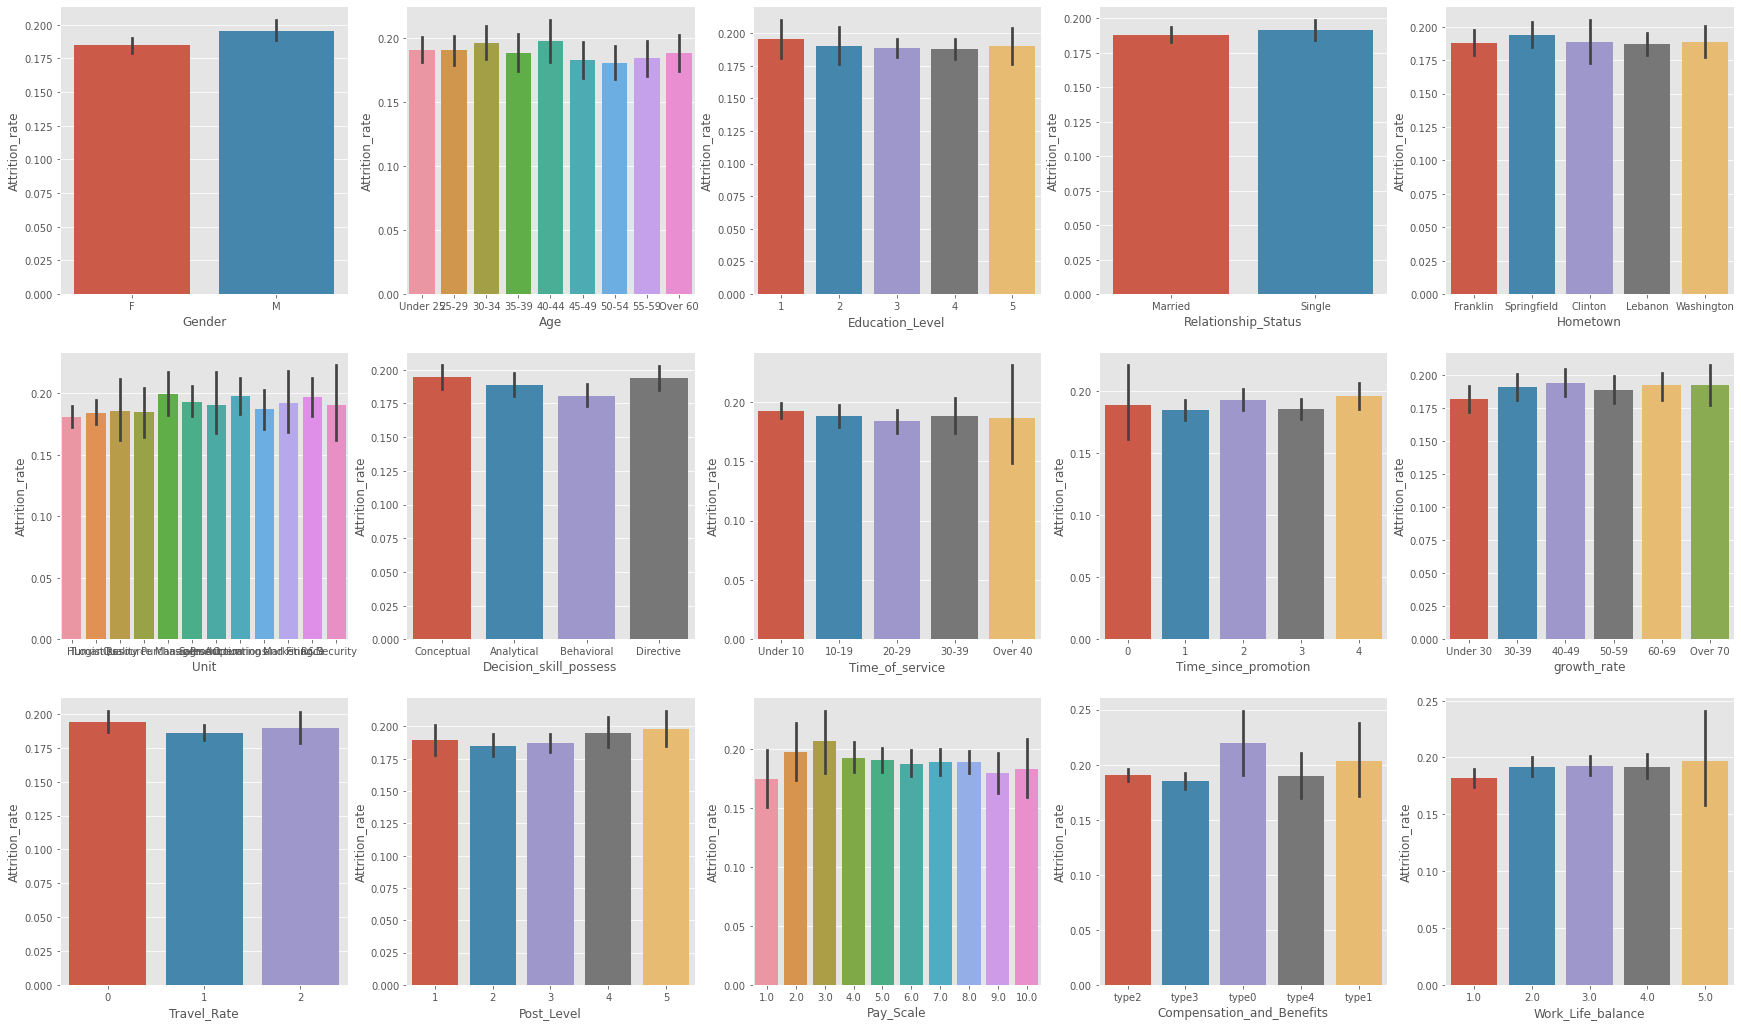

In [77]:
#column별 카운트
train_his = train.copy()
train_his.drop(['VAR1', 'VAR2', 'VAR3', 'VAR4', 'VAR5', 'VAR6', 'VAR7'], axis=1, inplace=True)

fig, axs = plt.subplots(figsize=(30, 18), ncols=5, nrows=3)
cat_features = ['Gender', 'Age', 'Education_Level', 'Relationship_Status', 'Hometown',
                'Unit', 'Decision_skill_possess', 'Time_of_service',
                'Time_since_promotion', 'growth_rate', 'Travel_Rate', 'Post_Level',
                'Pay_Scale', 'Compensation_and_Benefits', 'Work_Life_balance']
                
# cat_features에 있는 모든 칼럼별로 개별 칼럼값에 따른 count의 합을 barplot으로 시각화
for i, feature in enumerate(cat_features):
    row = int(i/5)
    col = i%5
    # 시본의 barplot을 이용해 칼럼값에 따른 count의 평균값을 표현
    sns.barplot(x=feature, y='Attrition_rate', data=train_his, ax=axs[row][col])

---

# Feature Engineering

In [115]:
#필요없는 컬럼 drop
train = train.drop('Employee_ID', axis=1)

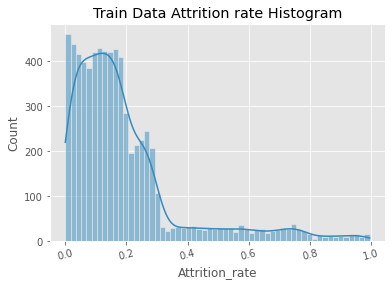

In [116]:
plt.title('Train Data Attrition rate Histogram')
plt.xticks(rotation=15)
sns.histplot(train['Attrition_rate'], kde=True)
plt.show()

In [117]:
#타겟값 로그 변형
train['Attrition_rate'] = np.log1p(train['Attrition_rate'])

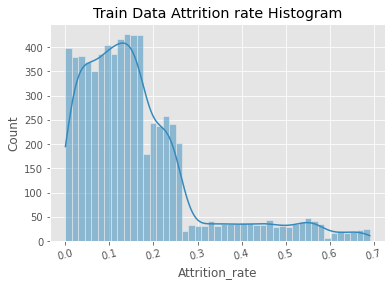

In [83]:
plt.title('Train Data Attrition rate Histogram')
plt.xticks(rotation=15)
sns.histplot(train['Attrition_rate'], kde=True)
plt.show()

In [84]:
train.shape

(7000, 23)



---

# 학습 데이터, 검증 데이터 분리

In [118]:
#target, feature 분리
target = 'Attrition_rate'
y = train[target]
X = train.drop(target, axis=1, inplace=False)

X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42 )

In [119]:
X_train.shape, X_val.shape, y_train.shape, y_val.shape

((5600, 22), (1400, 22), (5600,), (1400,))



---

# 기준모델 설정

In [ ]:
#학습 데이터의 기준모델 성능 확인
predict_train = y_train.mean()

y_pred_train = [predict_train] * len(y_train)
mae_train = mean_absolute_error(y_train, y_pred_train)
mse_train = mean_squared_error(y_train, y_pred_train)    
rmse_train = mean_squared_error(y_train, y_pred_train)**0.5
r2_train = r2_score(y_train, y_pred_train)

print(f'학습 데이터의 기준 모델 MAE: {mae_train:.5f}')
print(f'학습 데이터의 기준 모델 MSE: {mse_train:.5f}')
print(f'학습 데이터의 기준 모델 RMSE: {rmse_train:.5f}')
print(f'학습 데이터의 기준 모델 R2: {r2_train:.5f}\n')

#검증 데이터의 기준모델 성능 확인 
predict_val = y_val.mean()

y_pred_val = [predict_val] * len(y_val)
mae_val = mean_absolute_error(y_val, y_pred_val)
mse_val = mean_squared_error(y_val, y_pred_val)    
rmse_val = mean_squared_error(y_val, y_pred_val)**0.5
r2_val = r2_score(y_val, y_pred_val)

print(f'검증 데이터의 기준 모델 MAE: {mae_val:.5f}')
print(f'검증 데이터의 기준 모델 MSE: {mse_val:.5f}')
print(f'검증 데이터의 기준 모델 RMSE: {rmse_val:.5f}')
print(f'검증 데이터의 기준 모델 R2: {r2_val:.5f}')

# 학습 데이터의 기준 모델 MAE: 0.09965
# 학습 데이터의 기준 모델 MSE: 0.01920
# 학습 데이터의 기준 모델 RMSE: 0.13856
# 학습 데이터의 기준 모델 R2: 0.00000

# 검증 데이터의 기준 모델 MAE: 0.09805
# 검증 데이터의 기준 모델 MSE: 0.01926
# 검증 데이터의 기준 모델 RMSE: 0.13878
# 검증 데이터의 기준 모델 R2: 0.00000

학습 데이터의 기준 모델 MAE: 0.09965
학습 데이터의 기준 모델 MSE: 0.01920
학습 데이터의 기준 모델 RMSE: 0.13856
학습 데이터의 기준 모델 R2: 0.00000

검증 데이터의 기준 모델 MAE: 0.09805
검증 데이터의 기준 모델 MSE: 0.01926
검증 데이터의 기준 모델 RMSE: 0.13878
검증 데이터의 기준 모델 R2: 0.00000


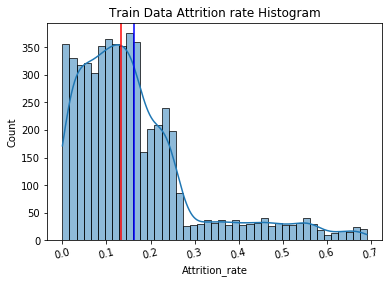

In [ ]:
plt.title('Train Data Attrition rate Histogram')
plt.xticks(rotation=15)
sns.histplot(y_train, kde=True)
plt.axvline(y_train.mean(), color='blue')
plt.axvline(y_train.median(), color='red')
plt.show()

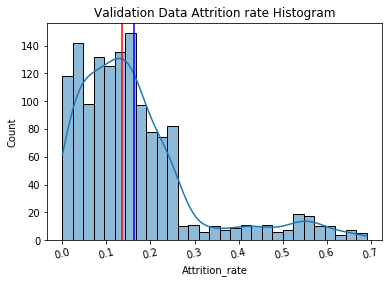

In [ ]:
plt.title('Validation Data Attrition rate Histogram')
plt.xticks(rotation=15)
sns.histplot(y_val, kde=True)
plt.axvline(y_val.mean(), color='blue')
plt.axvline(y_val.median(), color='red')
plt.show()



---

# Encoding

In [ ]:
X_train.head()

,Gender,Age,Education_Level,Relationship_Status,Hometown,Unit,Decision_skill_possess,Time_of_service,Time_since_promotion,growth_rate,...,Pay_Scale,Compensation_and_Benefits,Work_Life_balance,VAR1,VAR2,VAR3,VAR4,VAR5,VAR6,VAR7
1032,M,Under 25,3,Married,Franklin,Purchasing,Conceptual,Under 10,0,40-49,...,10.0,type2,2.0,4,-0.1048,-2.7762,2.0,2,5,2
6339,F,NaN,2,Single,Springfield,R&D,Conceptual,Under 10,3,50-59,...,6.0,type3,3.0,4,0.7516,-2.7762,2.0,4,8,3
3886,M,40-44,4,Single,Lebanon,Human Resource Management,Behavioral,10-19,3,30-39,...,6.0,type2,3.0,2,0.7516,0.7075,2.0,4,7,4
2653,M,Under 25,4,Married,Franklin,Operarions,Behavioral,Under 10,3,Over 70,...,8.0,type0,1.0,4,0.7516,-0.4537,2.0,4,6,4
6914,F,45-49,5,Married,Franklin,Production,Behavioral,10-19,3,Under 30,...,7.0,type2,2.0,2,-0.9612,1.8688,2.0,4,7,2


In [ ]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5600 entries, 1032 to 860
Data columns (total 22 columns):
 #   Column                     Non-Null Count  Dtype   
---  ------                     --------------  -----   
 0   Gender                     5600 non-null   object  
 1   Age                        5275 non-null   category
 2   Education_Level            5600 non-null   int64   
 3   Relationship_Status        5600 non-null   object  
 4   Hometown                   5600 non-null   object  
 5   Unit                       5600 non-null   object  
 6   Decision_skill_possess     5600 non-null   object  
 7   Time_of_service            5487 non-null   category
 8   Time_since_promotion       5600 non-null   int64   
 9   growth_rate                5600 non-null   category
 10  Travel_Rate                5600 non-null   int64   
 11  Post_Level                 5600 non-null   int64   
 12  Pay_Scale                  5591 non-null   float64 
 13  Compensation_and_Benefits  5600

**인코딩 해줘야 하는 컬럼은 아래와 같다**

---

> **Gender, Relationship_Status, Hometown, Unit, Decision_skill_possess**<br>
*-순서가 상관이 없고, 타겟값에 큰 영향이 없으니 **onehot encoding**<br>*

<!-- > **Age**<br>
*-순서가 상관이 없으나, 타겟값에 영향이 있으니 **label encoding**<br>* -->

> **growth_rate**<br>
*-순서가 상관이 있고, 타겟값에 큰 영향이 없으니 **ordinal encoding**<br>*

> **Age, Time_of_service, Compensation_and_Benefits**<br>
*-순서가 상관이 있고, 타겟값에 영향이 있으니 **target encoding**<br>*

In [ ]:
enc = make_pipeline(
             OneHotEncoder(cols = ['Gender', 'Relationship_Status', 'Hometown', 'Unit', 'Decision_skill_possess']),
             OrdinalEncoder(cols = 'growth_rate'),
             TargetEncoder(cols = ['Age', 'Time_of_service', 'Compensation_and_Benefits'])
)
X_train = enc.fit_transform(X_train, y_train)
X_val = enc.transform(X_val)

X_train.shape, X_val.shape, X_test.shape

In [ ]:
X_train.head()

,Gender_1,Gender_2,Age,Education_Level,Relationship_Status_1,Relationship_Status_2,Hometown_1,Hometown_2,Hometown_3,Hometown_4,...,Pay_Scale,Compensation_and_Benefits,Work_Life_balance,VAR1,VAR2,VAR3,VAR4,VAR5,VAR6,VAR7
1032,1,0,0.162072,3,1,0,1,0,0,0,...,10.0,0.163089,2.0,4,-0.1048,-2.7762,2.0,2,5,2
6339,0,1,0.162072,2,0,1,0,1,0,0,...,6.0,0.161561,3.0,4,0.7516,-2.7762,2.0,4,8,3
3886,1,0,0.164796,4,0,1,0,0,1,0,...,6.0,0.163089,3.0,2,0.7516,0.7075,2.0,4,7,4
2653,1,0,0.162072,4,1,0,1,0,0,0,...,8.0,0.189788,1.0,4,0.7516,-0.4537,2.0,4,6,4
6914,0,1,0.156439,5,1,0,1,0,0,0,...,7.0,0.163089,2.0,2,-0.9612,1.8688,2.0,4,7,2


In [ ]:
# MAE, MSE, RMSE 계산
def evaluate_regr(y,pred):
    mae_val = mean_absolute_error(y,pred)
    mse_val = mean_squared_error(y, pred)
    rmse_val = mean_squared_error(y, pred)**0.5
    r2 = r2_score(y, pred)
    print('MAE: {0:.5f}, MSE: {1:.5F}, RMSE: {2:.5F}, R2: {3:.5F}'.format(mae_val, mse_val, rmse_val, r2))


# 선형
def get_model_predict(model, X_train, X_val, y_train, y_val):
    model.fit(X_train, y_train)
    pred = model.predict(X_val)
    print('###',model.__class__.__name__,'###')
    evaluate_regr(y_val, pred)   

# model 별로 평가 수행
lr_reg = LinearRegression()
ridge_reg = Ridge()
lasso_reg = Lasso()

for model in [lr_reg, ridge_reg, lasso_reg]:
    get_model_predict(model,X_train, X_val, y_train, y_val)


# 트리
def get_model_predict(model, X_train, X_val, y_train, y_val):
    model.fit(X_train, y_train)
    pred = model.predict(X_val)
    print('###',model.__class__.__name__,'###')
    evaluate_regr(y_val, pred)

# model 별로 평가 수행
rf_reg = RandomForestRegressor(n_estimators=500)
xgb_reg = XGBRegressor(n_estimators=500)
lgbm_reg = LGBMRegressor(n_estimators=500)

for model in [rf_reg, xgb_reg, lgbm_reg]:
    # XGBoost의 경우 DataFrame이 입력 될 경우 버전에 따라 오류 발생 가능. ndarray로 변환.
    get_model_predict(model,X_train.values, X_val.values, y_train.values, y_val.values)

### LinearRegression ###
MAE: 0.09906, MSE: 0.01947, RMSE: 0.13954, R2: -0.01103
### Ridge ###
MAE: 0.09875, MSE: 0.01939, RMSE: 0.13926, R2: -0.00701
### Lasso ###
MAE: 0.09814, MSE: 0.01926, RMSE: 0.13878, R2: -0.00001
### RandomForestRegressor ###
MAE: 0.10266, MSE: 0.01981, RMSE: 0.14075, R2: -0.02867
[09:02:02] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
### XGBRegressor ###
MAE: 0.10261, MSE: 0.02066, RMSE: 0.14375, R2: -0.07298
### LGBMRegressor ###
MAE: 0.10792, MSE: 0.02188, RMSE: 0.14791, R2: -0.13598


# 결과
### 기준모델 ###
MAE: 0.09965, MSE: 0.01920, RMSE: 0.13856, R2: 0.00000
<br><br>
### LinearRegression ###
MAE: 0.09906, MSE: 0.01947, RMSE: 0.13954, R2: -0.01103
### Ridge ###
MAE: 0.09875, MSE: 0.01939, RMSE: 0.13926, R2: -0.00701
### Lasso ###
MAE: 0.09814, MSE: 0.01926, RMSE: 0.13878, R2: -0.00001<br><br>
### RandomForestRegressor ###
MAE: 0.10266, MSE: 0.01981, RMSE: 0.14075, R2: -0.02867
### XGBRegressor ###
MAE: 0.10261, MSE: 0.02066, RMSE: 0.14375, R2: -0.07298
### LGBMRegressor ###
MAE: 0.10792, MSE: 0.02188, RMSE: 0.14791, R2: -0.13598



기준모델이 좋기 때문에 하이퍼 파라미터 조정을 통해 성능을 높힌다.<br>
혹시 모르니 Linear Regression을 제외한 모든 모델을 확인한다. 



---



In [144]:
#회귀계수 확인
def get_top_bottom_coef(model):
    coef = pd.Series(model.coef_, index=X_train.columns)
    
    coef_high = coef.sort_values(ascending=False).head(10)
    coef_low = coef.sort_values(ascending=False).tail(10)
    return coef_high, coef_low

def visualize_coefficient(models):
    fig, axs = plt.subplots(figsize=(20,12),nrows=1, ncols=3)
    fig.tight_layout() 

    for i_num, model in enumerate(models):
        coef_high, coef_low = get_top_bottom_coef(model)
        coef_concat = pd.concat( [coef_high , coef_low] )
        axs[i_num].set_title(model.__class__.__name__+' Coeffiecents', size=25)
        axs[i_num].tick_params(axis="y",direction="in", pad=-120)
        for label in (axs[i_num].get_xticklabels() + axs[i_num].get_yticklabels()):
            label.set_fontsize(15)
        sns.barplot(x=coef_concat.values, y=coef_concat.index , ax=axs[i_num])

# lr_reg, ridge_reg, lasso_reg 모델의 회귀 계수 시각화.    
models = [lr_reg, ridge_reg, lasso_reg]
visualize_coefficient(models)

NameError: ignored

In [143]:
#선형모델
def print_best_params(model, params):
    grid_model = GridSearchCV(model, param_grid=params, 
                              scoring='neg_mean_absolute_error', cv=5)
    grid_model.fit(X_train, y_train)

    print('{0} 5 CV 시 최적 평균 MAE 값: {1}, 최적 alpha:{2}'.format(model.__class__.__name__,
                                        np.round(-1*grid_model.best_score_, 4), grid_model.best_params_))
    return grid_model.best_estimator_

ridge_params = { 'alpha':[0.05, 0.1, 1, 5, 8, 10, 12, 15, 20] }
lasso_params = { 'alpha':[0.001, 0.005, 0.008, 0.05, 0.03, 0.1, 0.5, 1,5, 10] }
best_ridge = print_best_params(ridge_reg, ridge_params)
best_lasso = print_best_params(lasso_reg, lasso_params)

NameError: ignored

Ridge 5 CV 시 최적 평균 MAE 값: 0.128, 최적 alpha:{'alpha': 20}<br>
Lasso 5 CV 시 최적 평균 MAE 값: 0.127, 최적 alpha:{'alpha': 0.008}

In [ ]:
# model 별로 평가 수행
lr_reg = LinearRegression()
ridge_reg = Ridge(alpha=20)
lasso_reg = Lasso(alpha=0.008)

for model in [lr_reg, ridge_reg, lasso_reg]:
    get_model_predict(model,X_train, X_val, y_train, y_val)

### LinearRegression ###
MAE: 0.09906, MSE: 0.01947, RMSE: 0.13954, R2: -0.01103
### Ridge ###
MAE: 0.09872, MSE: 0.01938, RMSE: 0.13923, R2: -0.00653
### Lasso ###
MAE: 0.09814, MSE: 0.01926, RMSE: 0.13878, R2: -0.00001


# 하이퍼 파라미터 조정전
###Ridge###
MAE: 0.09875, MSE: 0.01939, RMSE: 0.13926, R2: -0.00701
###Lasso###
MAE: 0.09814, MSE: 0.01926, RMSE: 0.13878, R2: -0.00001
<br><br>
# 하이퍼 파라미터 조정후
### Ridge ###
MAE: 0.09872, MSE: 0.01938, RMSE: 0.13923, R2: -0.00653
### Lasso ###
MAE: 0.09814, MSE: 0.01926, RMSE: 0.13878, R2: -0.00001

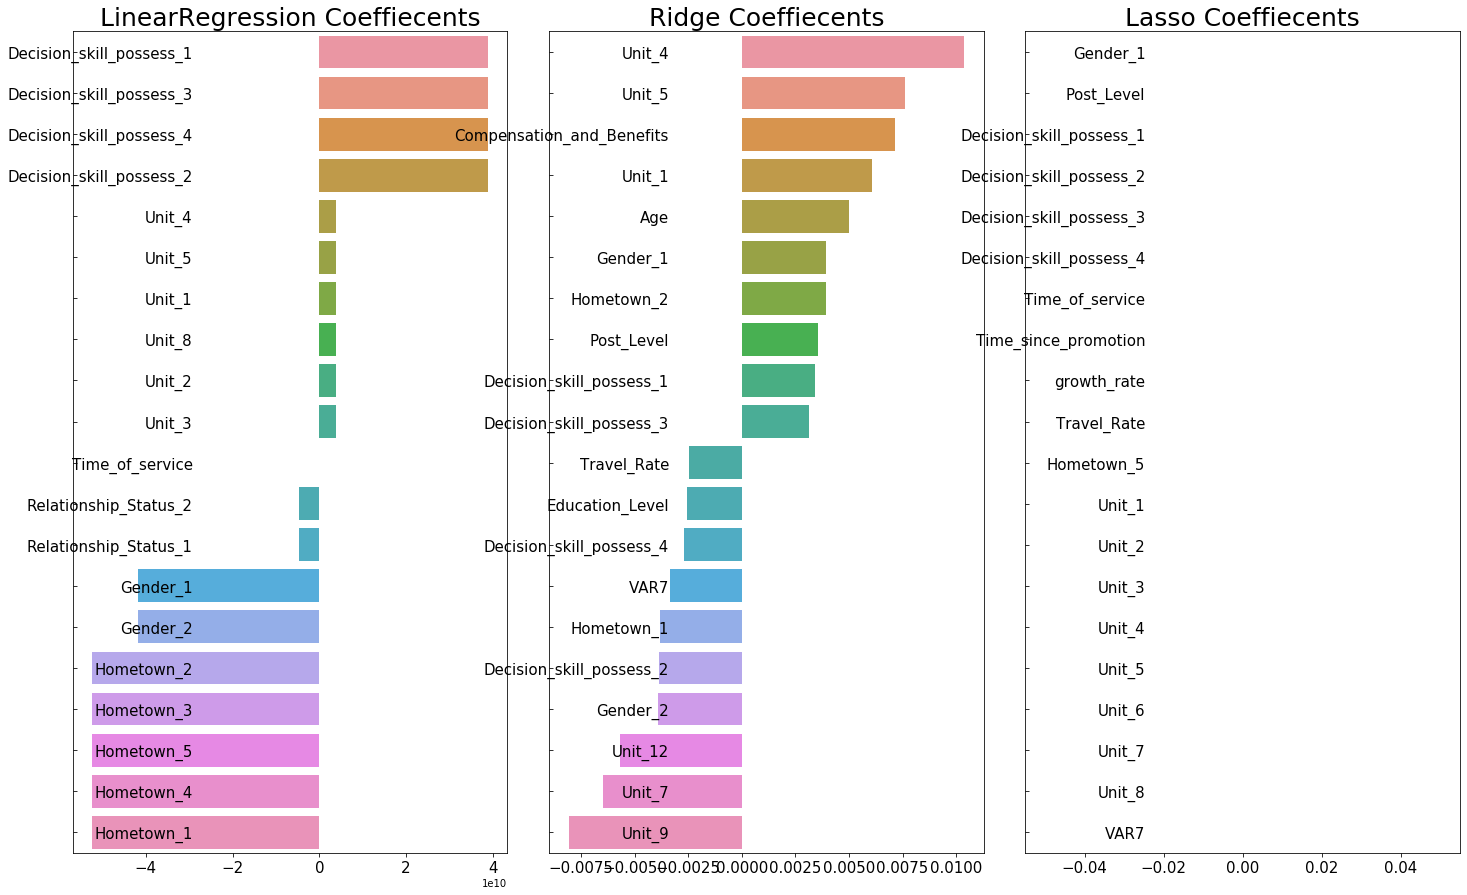

In [ ]:
models = [lr_reg, ridge_reg, lasso_reg]
visualize_coefficient(models)

In [ ]:
#트리기반 모델
rf_params = {'n_estimators':[1000]}
rf_reg = RandomForestRegressor()
best_rf = print_best_params(rf_reg, rf_params)

xgb_params = {'n_estimators':[1000]}
xgb_reg = XGBRegressor()
best_xgb = print_best_params(xgb_reg, xgb_params)

lgbm_params = {'n_estimators':[1000]}
lgbm_reg = LGBMRegressor()
best_lgbm = print_best_params(lgbm_reg, lgbm_params)

RandomForestRegressor 5 CV 시 최적 평균 MAE 값: 0.1044, 최적 alpha:{'n_estimators': 1000}
[09:09:21] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[09:09:26] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[09:09:31] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[09:09:36] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[09:09:41] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[09:09:46] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
XGBRegressor 5 CV 시 최적 평균 MAE 값: 0.1085, 최적 alpha:{'n_estimators': 1000}
LGBMRegressor 5 CV 시 최적 평균 MAE 값: 0.1125, 최적 alpha:{'n_estimators': 1000}


In [142]:
# 모델의 중요도 상위 20개의 피처명과 그때의 중요도값을 Series로 반환.
def get_top_features(model):
    ftr_importances_values = model.feature_importances_
    ftr_importances = pd.Series(ftr_importances_values, index=X_train.columns  )
    ftr_top20 = ftr_importances.sort_values(ascending=False)[:20]
    return ftr_top20

def visualize_ftr_importances(models):
    # 2개 회귀 모델의 시각화를 위해 2개의 컬럼을 가지는 subplot 생성
    fig, axs = plt.subplots(figsize=(24,10),nrows=1, ncols=3)
    fig.tight_layout() 
    # 입력인자로 받은 list객체인 models에서 차례로 model을 추출하여 피처 중요도 시각화. 
    for i_num, model in enumerate(models):
        # 중요도 상위 20개의 피처명과 그때의 중요도값 추출 
        ftr_top20 = get_top_features(model)
        axs[i_num].set_title(model.__class__.__name__+' Feature Importances', size=25)
        #font 크기 조정.
        for label in (axs[i_num].get_xticklabels() + axs[i_num].get_yticklabels()):
            label.set_fontsize(22)
        sns.barplot(x=ftr_top20.values, y=ftr_top20.index , ax=axs[i_num])

# 앞 예제에서 print_best_params( )가 반환한 GridSearchCV로 최적화된 모델의 피처 중요도 시각화    
models = [best_rf, best_xgb, best_lgbm]
visualize_ftr_importances(models)

NameError: ignored

In [ ]:
#randomforest 하이퍼 파라미터 조정
params_randomforest={
 "max_depth"        : [ 4, 6, 8, 10 ],
 "n_estimators"     : [ 50, 100, 150, 500, 1000 ],
 "min_samples_leaf" : [ 4, 8, 12, 16 ],
 "max_features"     : ['sqrt', 'log2', None],
 "criterion"        : ['squared_error', 'absolute_error', 'poisson']
}

random_search_rs=RandomizedSearchCV(rf_reg, param_distributions=params_randomforest,n_iter=10,n_jobs=-1,cv=5,verbose=3,random_state=42, scoring='neg_mean_absolute_error')
random_search_rs.fit(X_train,y_train)
print("randomforest 하이퍼 파라미터: ", random_search_rs.best_params_)
print("MAE: ", -1 * random_search_rs.best_score_)


#xgb 하이퍼 파라미터 조정
params_xgb = {'max_depth': [ 4, 6, 8, 10, 15, 20 ], 
              'min_child_weight': [ 1, 2, 4, 6 ],
              'colsample_bytree': [ 0.5, 0.75, 0.95 ],
              'learning_rate': [ 0.01, 0.02, 0.05, 0.1, 0.2 ]
            }

random_search_xgb=RandomizedSearchCV(xgb_reg,param_distributions=params_xgb,n_iter=10,n_jobs=-1,cv=5,verbose=3,random_state=42, scoring='neg_mean_absolute_error')
random_search_xgb.fit(X_train,y_train)
print("xgb 하이퍼 파라미터: ", random_search_xgb.best_params_)
print("MAE: ", -1 * random_search_xgb.best_score_)


#lgbm 하이퍼 파라미터 조정
params_lbgm = {'num_leaves': [32, 36, 40, 50, 60 ],
               'max_depth': [ 4, 6, 8, 10, 15, 20 ],
               'min_child_samples': [60, 80, 100 ],
               'subsample': [0.5, 0.75, 1.0 ],
               'learning_rate': [ 0.01, 0.02, 0.05, 0.1, 0.2 ]
              }

random_search_lgbm=RandomizedSearchCV(lgbm_reg,param_distributions=params_lbgm,n_iter=10,n_jobs=-1,cv=5,verbose=3,random_state=42, scoring='neg_mean_absolute_error')
random_search_lgbm.fit(X_train,y_train)
print("lgbm 하이퍼 파라미터: ", random_search_lgbm.best_params_)
print("MAE: ", -1 * random_search_lgbm.best_score_)

Fitting 5 folds for each of 10 candidates, totalling 50 fits
randomforest 하이퍼 파라미터:  {'n_estimators': 50, 'min_samples_leaf': 12, 'max_features': 'log2', 'max_depth': 8, 'criterion': 'absolute_error'}
MAE:  0.09612343007572607
Fitting 5 folds for each of 10 candidates, totalling 50 fits
[09:29:29] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
xgb 하이퍼 파라미터:  {'min_child_weight': 2, 'max_depth': 8, 'learning_rate': 0.05, 'colsample_bytree': 0.5}
MAE:  0.10304189057731854
Fitting 5 folds for each of 10 candidates, totalling 50 fits
lgbm 하이퍼 파라미터:  {'subsample': 0.75, 'num_leaves': 32, 'min_child_samples': 100, 'max_depth': 8, 'learning_rate': 0.01}
MAE:  0.10015488942954465


# 랜덤포레스트
하이퍼 파라미터:  {'n_estimators': 50, 'min_samples_leaf': 12, 'max_features': 'log2', 'max_depth': 8, 'criterion': 'absolute_error'}
MAE:  0.09612343007572607

# XGB 
하이퍼 파라미터:  {'min_child_weight': 2, 'max_depth': 8, 'learning_rate': 0.05, 'colsample_bytree': 0.5}
MAE:  0.10304189057731854

# LGBM
하이퍼 파라미터:  {'subsample': 0.75, 'num_leaves': 32, 'min_child_samples': 100, 'max_depth': 8, 'learning_rate': 0.01}
MAE:  0.10015488942954465

In [141]:
# model 별로 평가 수행
rf_reg = RandomForestRegressor(n_estimators = 50, min_samples_leaf= 12, max_features= 'log2', max_depth= 8, criterion= 'absolute_error')
xgb_reg = XGBRegressor(min_child_weight= 2, max_depth = 8, learning_rate= 0.05, colsample_bytree= 0.5)
lgbm_reg = LGBMRegressor(subsample= 0.75, num_leaves = 32, min_child_samples= 100, max_depth= 8, learning_rate= 0.01)

for model in [rf_reg, xgb_reg, lgbm_reg]:
    # XGBoost의 경우 DataFrame이 입력 될 경우 버전에 따라 오류 발생 가능. ndarray로 변환.
    get_model_predict(model,X_train.values, X_val.values, y_train.values, y_val.values)

NameError: ignored

# 하이퍼 파라미터 조정 전###
###RandomForestRegressor
MAE: 0.10266, MSE: 0.01981, RMSE: 0.14075, R2: -0.02867
###XGBRegressor###
MAE: 0.10261, MSE: 0.02066, RMSE: 0.14375, R2: -0.07298
###LGBMRegressor###
MAE: 0.10792, MSE: 0.02188, RMSE: 0.14791, R2: -0.13598


# 하이퍼 파라미터 조정 후
### RandomForestRegressor ###
MAE: 0.09483, MSE: 0.02011, RMSE: 0.14182, R2: -0.04443

### XGBRegressor ###
MAE: 0.10134, MSE: 0.01990, RMSE: 0.14108, R2: -0.03352
### LGBMRegressor ###
MAE: 0.09861, MSE: 0.01932, RMSE: 0.13900, R2: -0.00322

RandomForestRegressor 5 CV 시 최적 평균 MAE 값: 0.0963, 최적 alpha:{'criterion': 'absolute_error', 'max_depth': 8, 'max_features': 'log2', 'min_samples_leaf': 12, 'n_estimators': 50}
[09:33:39] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[09:33:40] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[09:33:41] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[09:33:42] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[09:33:43] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[09:33:44] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
XGBRegressor 5 CV 시 최적 평균 MAE 값: 0.103, 최적 alpha:{'colsample_by

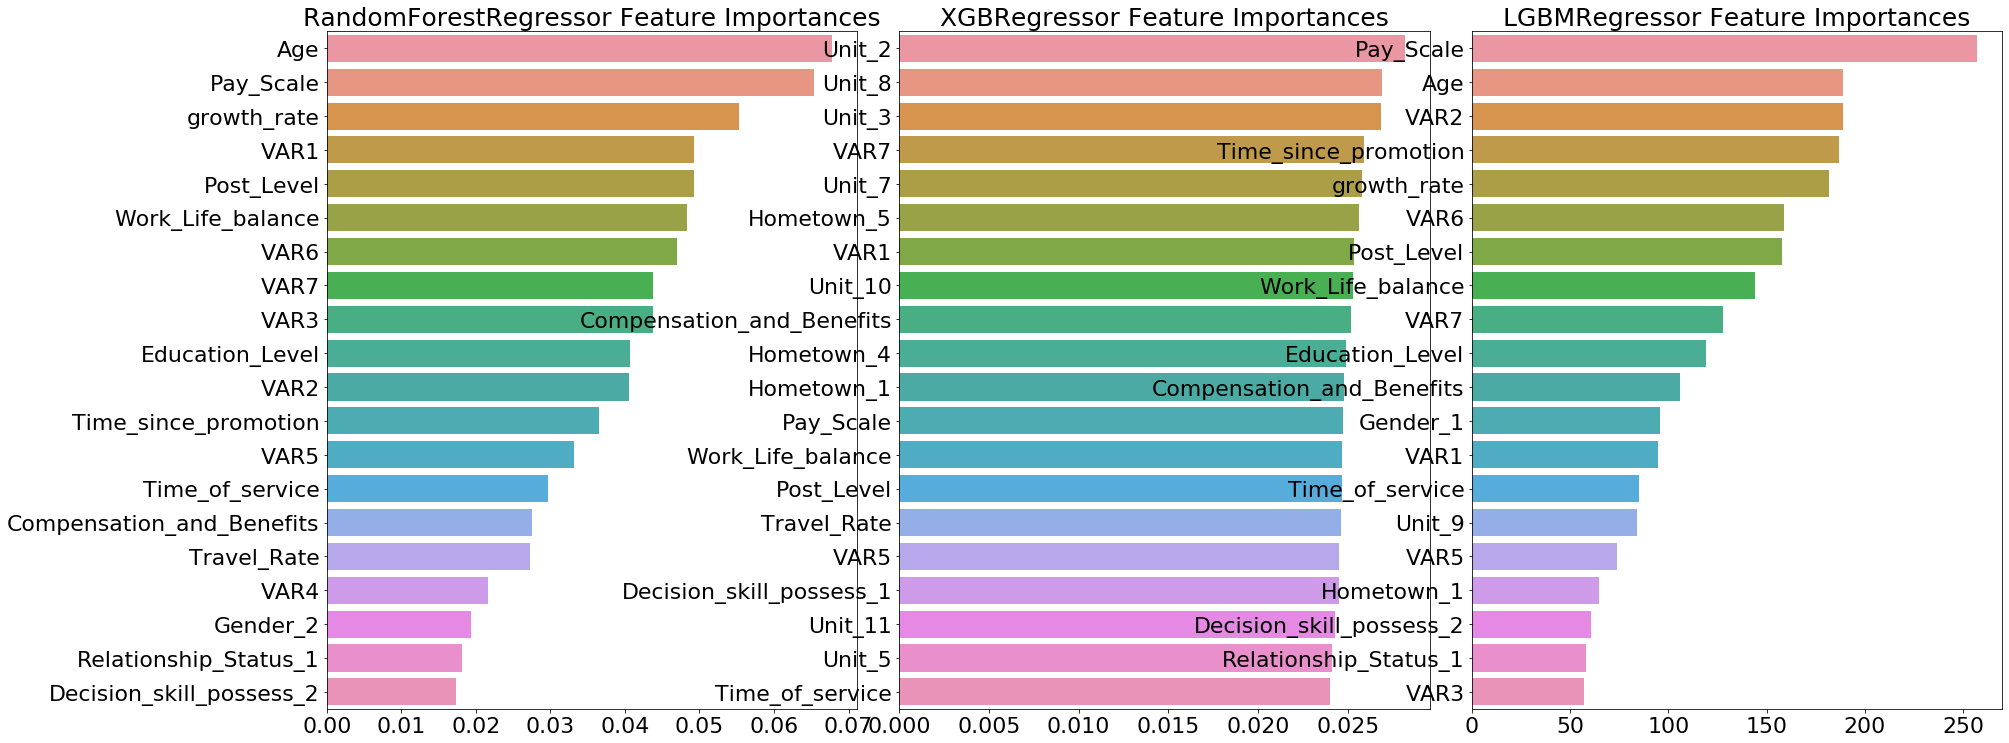

In [ ]:
rf_params = {'n_estimators': [50], 'min_samples_leaf': [12], 'max_features': ['log2'], 'max_depth': [8], 'criterion': ['absolute_error']}
best_rf = print_best_params(rf_reg, rf_params)

xgb_params = {'min_child_weight': [2], 'max_depth': [8], 'learning_rate': [0.05], 'colsample_bytree': [0.5]}
best_xgb = print_best_params(xgb_reg, xgb_params)

lgbm_params = {'subsample': [0.75], 'num_leaves': [32], 'min_child_samples': [100], 'max_depth': [8], 'learning_rate': [0.01]}
best_lgbm = print_best_params(lgbm_reg, lgbm_params)

models = [best_rf, best_xgb, best_lgbm]
visualize_ftr_importances(models)



---

# 최종모델

In [87]:
pipe_rf = make_pipeline(
             OneHotEncoder(cols = ['Gender', 'Relationship_Status', 'Hometown', 'Unit', 'Decision_skill_possess']),
             OrdinalEncoder(cols = 'growth_rate'),
             TargetEncoder(cols = ['Age', 'Time_of_service', 'Compensation_and_Benefits'], smoothing=100),
             RandomForestRegressor(n_estimators = 150, min_samples_leaf= 12, max_features= None, max_depth= 4, criterion= 'absolute_error')
)
pipe_rf.fit(X_train, y_train)

Pipeline(steps=[('onehotencoder',
                 OneHotEncoder(cols=['Gender', 'Relationship_Status',
                                     'Hometown', 'Unit',
                                     'Decision_skill_possess'])),
                ('ordinalencoder',
                 OrdinalEncoder(cols=['growth_rate'],
                                mapping=[{'col': 'growth_rate',
                                          'data_type': CategoricalDtype(categories=['Under 30', '30-39', '40-49', '50-59', '60-69', 'Over 70'], ordered=True),
                                          'mapping': Under 30    1
30-39       2
40-49       3
50-59       4
60-69       5
Over 70     6
NaN        -2
dtype: int64}])),
                ('targetencoder',
                 TargetEncoder(cols=['Age', 'Time_of_service',
                                     'Compensation_and_Benefits'],
                               smoothing=100.0)),
                ('randomforestregressor',
                 RandomForestRegress

In [ ]:
k=5

scores = cross_val_score(pipe_rf, X_train, y_train, cv=k, 
                         scoring='neg_mean_absolute_error')

print(f'MAE for {k} folds:', -scores.mean())

In [100]:
k=5

scores = cross_val_score(pipe.rf, X_train, y_train, cv=k, 
                         scoring='neg_mean_squared_error')

print(f'MSE for {k} folds:', -scores.mean())

MAE for 5 folds: 0.020132443671623472


In [102]:
rmse = np.sqrt(-scores.mean())
rmse

0.1418888426608078

In [91]:
pipe_lgbm = make_pipeline(
             OneHotEncoder(cols = ['Gender', 'Relationship_Status', 'Hometown', 'Unit', 'Decision_skill_possess']),
             OrdinalEncoder(cols = 'growth_rate'),
             TargetEncoder(cols = ['Age', 'Time_of_service', 'Compensation_and_Benefits'], smoothing=100),
             LGBMRegressor(subsample= 0.75, num_leaves = 32, min_child_samples= 100, max_depth= 8, learning_rate= 0.01)
)
pipe_lgbm.fit(X_train, y_train)

Pipeline(steps=[('onehotencoder',
                 OneHotEncoder(cols=['Gender', 'Relationship_Status',
                                     'Hometown', 'Unit',
                                     'Decision_skill_possess'])),
                ('ordinalencoder',
                 OrdinalEncoder(cols=['growth_rate'],
                                mapping=[{'col': 'growth_rate',
                                          'data_type': CategoricalDtype(categories=['Under 30', '30-39', '40-49', '50-59', '60-69', 'Over 70'], ordered=True),
                                          'mapping': Under 30    1
30-39       2
40-49       3
50-59       4
60-69       5
Over 70     6
NaN        -2
dtype: int64}])),
                ('targetencoder',
                 TargetEncoder(cols=['Age', 'Time_of_service',
                                     'Compensation_and_Benefits'],
                               smoothing=100.0)),
                ('lgbmregressor',
                 LGBMRegressor(learning_rate

In [92]:
k=5

scores = cross_val_score(pipe_lgbm, X_train, y_train, cv=k, 
                         scoring='neg_mean_absolute_error')

print(f'MAE for {k} folds:', -scores.mean())

MAE for 5 folds: [0.10583194 0.09869646 0.09993443 0.09830657 0.09796078]


In [103]:
k=5

scores = cross_val_score(pipe_lgbm, X_train, y_train, cv=k, 
                         scoring='neg_mean_squared_error')

print(f'MAE for {k} folds:', -scores.mean())

MAE for 5 folds: 0.01931381922207266


In [104]:
rmse = np.sqrt(-scores.mean())
rmse

0.1389741674631392



---

# 순열 중요도

In [125]:
pipe = Pipeline([
    ('preprocessing', make_pipeline(
                                    OneHotEncoder(cols = ['Gender', 'Relationship_Status', 'Hometown', 'Unit', 'Decision_skill_possess']),
                                    OrdinalEncoder(cols = 'growth_rate'),
                                    TargetEncoder(cols = ['Age', 'Time_of_service', 'Compensation_and_Benefits'], smoothing=100))),
    ('rf', RandomForestRegressor(n_estimators = 150, min_samples_leaf= 12, max_features= None, max_depth= 4, criterion= 'absolute_error')) 
])

In [128]:
pipe.named_steps

{'preprocessing': Pipeline(steps=[('onehotencoder',
                  OneHotEncoder(cols=['Gender', 'Relationship_Status',
                                      'Hometown', 'Unit',
                                      'Decision_skill_possess'])),
                 ('ordinalencoder', OrdinalEncoder(cols='growth_rate')),
                 ('targetencoder',
                  TargetEncoder(cols=['Age', 'Time_of_service',
                                      'Compensation_and_Benefits'],
                                smoothing=100.0))]),
 'rf': RandomForestRegressor(criterion='absolute_error', max_depth=4,
                       max_features=None, min_samples_leaf=12, n_estimators=150)}

In [129]:
permuter = PermutationImportance(
    pipe.named_steps['rf'],
    scoring='neg_mean_absolute_error',
    n_iter=5,
    random_state=42
)

pipe.fit(X_train, y_train)
X_val_transformed = pipe.named_steps['preprocessing'].transform(X_val)
permuter.fit(X_val_transformed, y_val);

In [131]:
feature_names = X_val_transformed.columns.tolist()
pd.Series(permuter.feature_importances_, feature_names).sort_values()

Post_Level                  -3.683536e-05
Time_since_promotion        -2.048630e-05
VAR6                        -1.945695e-05
Age                         -1.666797e-05
Work_Life_balance           -1.416150e-05
VAR7                        -1.408515e-05
Relationship_Status_1       -1.028076e-05
Decision_skill_possess_4    -9.427012e-06
Unit_8                      -8.288080e-06
Pay_Scale                   -7.858481e-06
Unit_5                      -7.451552e-06
Hometown_3                  -6.302198e-06
Time_of_service             -6.216276e-06
Unit_4                      -4.177197e-06
Unit_3                      -3.643697e-06
Decision_skill_possess_2    -3.419485e-06
Unit_11                     -2.924274e-06
Hometown_2                  -2.882416e-06
Unit_9                      -2.483605e-06
Gender_1                    -2.165804e-06
Unit_12                     -1.568417e-06
VAR4                        -8.325562e-07
Travel_Rate                 -5.852851e-07
Unit_6                      -1.638

In [132]:
eli5.show_weights(
    permuter, 
    top=None,
    feature_names=feature_names
)

Weight,Feature
0.0001 ± 0.0000,VAR1
0.0000 ± 0.0001,VAR2
0.0000 ± 0.0001,VAR3
0.0000 ± 0.0000,growth_rate
0.0000 ± 0.0000,VAR5
0.0000 ± 0.0000,Decision_skill_possess_3
0.0000 ± 0.0000,Decision_skill_possess_1
0.0000 ± 0.0000,Hometown_4
0.0000 ± 0.0000,Relationship_Status_2
0.0000 ± 0.0000,Gender_2


**큰 효과가 없어보여 생략**



---

# SHAP

In [154]:
explainer = shap.TreeExplainer(pipe.named_steps['rf'])

shap.initjs()

shap_values = explainer.shap_values(X_val_transformed.iloc[:300])
shap.force_plot(explainer.expected_value, shap_values, X_val_transformed.iloc[:300])

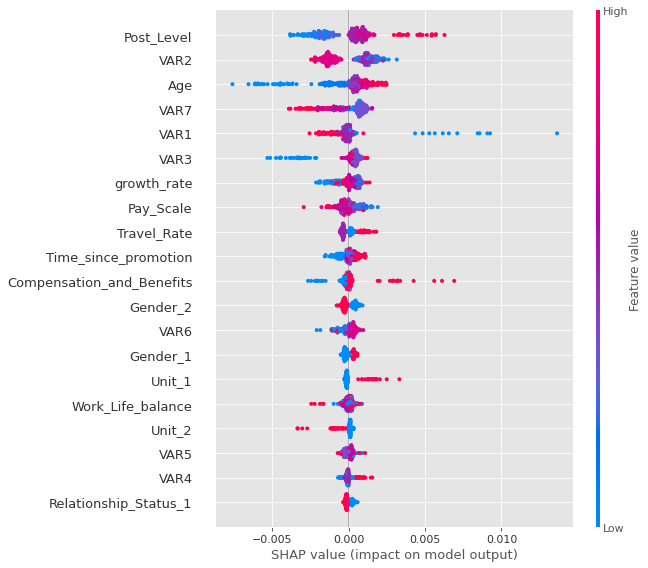

In [155]:
shap_values = explainer.shap_values(X_val_transformed.iloc[:300])
shap.summary_plot(shap_values, X_val_transformed.iloc[:300])

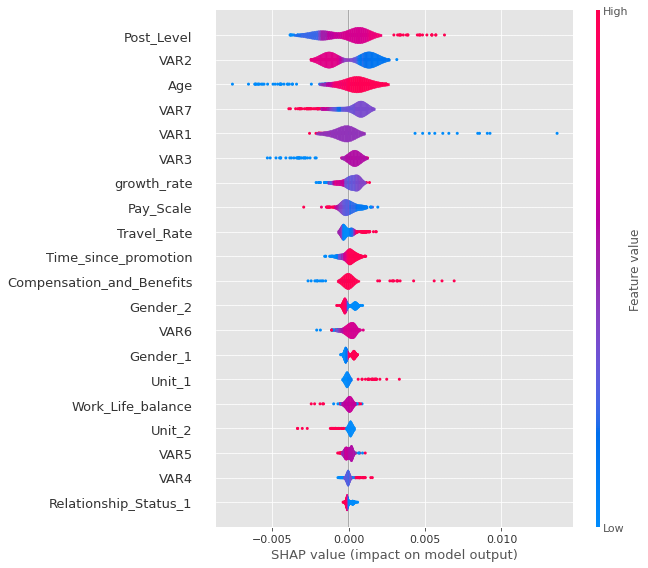

In [156]:
shap.summary_plot(shap_values, X_val_transformed.iloc[:300], plot_type="violin")

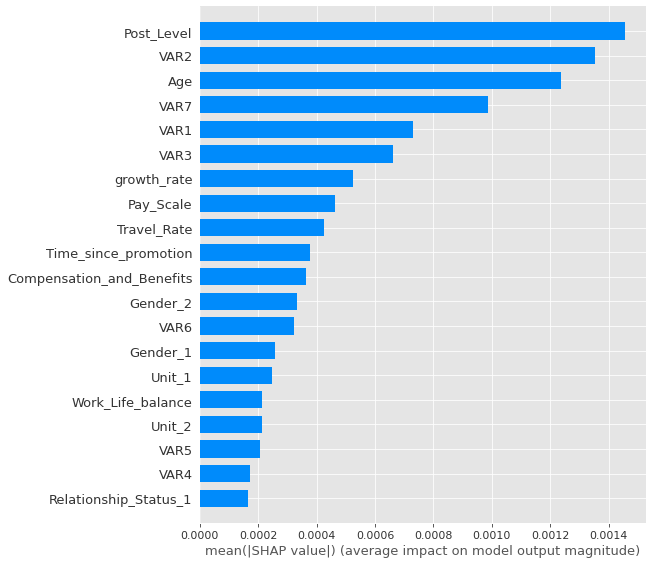

In [158]:
shap.summary_plot(shap_values, X_val_transformed.iloc[:300], plot_type="bar")